# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

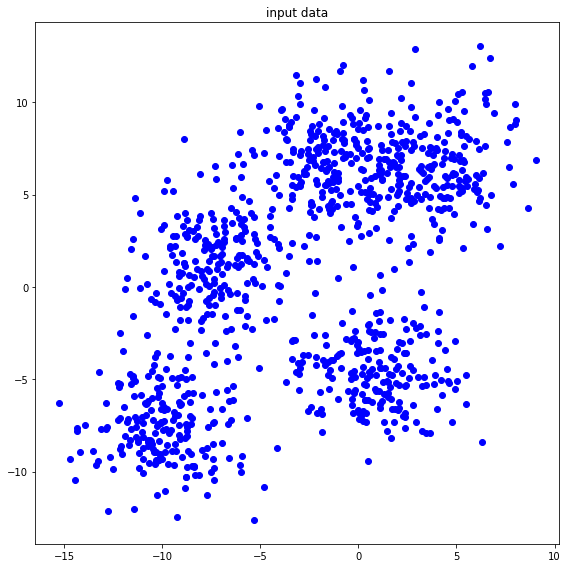

In [3]:

plt.figure(figsize=(8,8))
plt.title('input data')

plt.plot(x, y,'o', color='blue')


plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [40]:
def compute_distance(feature, center):
    distance = []
    for i in range(len(feature)):
        distance_x = (feature[i][0] - center[0]) ** 2
        distance_y = (feature[i][1] - center[1]) ** 2
        distance.append(np.sqrt(distance_x + distance_y))
    distance = np.array(distance)
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [236]:
def compute_centroid(feature, label_feature, value_label):
    num_check = 0
    index_storage = []
    centroids = np.zeros((2,))
    for i in range(number_data):
        if label_feature[i] == value_label:
            num_check += 1
            index_storage.append(i)
            
    cluster_feature = np.zeros(shape=(num_check, number_feature))
    for i in range(num_check):
        cluster_feature[i][0] = feature[index_storage[i]][0]
        cluster_feature[i][1] = feature[index_storage[i]][1]
        
    if num_check == 0:
        centroids[0] = 999999
        centroids[1] = 999999
        loss = 0
    else:
        centroids = np.mean(cluster_feature, axis = 0)
        loss = sum(compute_distance(cluster_feature, centroid[value_label]))
        
    return centroids, loss

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [130]:
def compute_label(distance):
    index_label_feature = np.zeros(number_data)

    for i in range(number_data):
        cluster = np.argmin(distance[i])
        index_label_feature[i] = cluster
    
    return index_label_feature


In [237]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 10
# ===================================================

In [238]:
label_feature = np.zeros(number_data)         #cluster label intialize

for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,number_cluster) # cluster 0 ~ 4

In [239]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
loss_iteration      = np.zeros(number_iteration)


for i in range(number_iteration):
    distance = distance.T
    temp = 0
    for k in range(number_cluster):
        a, loss = compute_centroid(feature, label_feature, k)
        temp += loss
        if a[0] > 99999:
            continue
        centroid[k] = a
        
    loss_iteration[i]   = temp * (1/number_data)    
        
    for j in range(number_cluster):
        distance[j] = compute_distance(feature, centroid[j])
        
    distance = distance.T
    label_feature = compute_label(distance)
    centroid_iteration[i] = centroid
    

### n = 10 case

In [302]:
# ===================================================
# assign the number of clusters and iterations
number_cluster_2      = 10
number_iteration    = 10
# ===================================================

In [303]:
label_feature_2 = np.zeros(number_data)         #cluster label intialize

for i in range(len(label_feature_2)):
    label_feature_2[i] = np.random.randint(0,number_cluster_2) # cluster 0 ~ 9

In [304]:
distance_2            = np.zeros(shape=(number_data, number_cluster_2))
centroid            = np.zeros(shape=(number_cluster_2, number_feature))
loss_iteration_2      = np.zeros(shape=(number_iteration, 1))
centroid_iteration_2  = np.zeros(shape=(number_iteration, number_cluster_2, number_feature))
loss_iteration_2      = np.zeros(number_iteration)


for i in range(number_iteration):
    distance_2 = distance_2.T
    temp = 0
    for k in range(number_cluster_2):
        a, loss = compute_centroid(feature, label_feature_2, k)
        temp += loss
        if a[0] > 99999:
            continue
        centroid[k] = a
        
    loss_iteration_2[i]   = temp * (1/number_data)    
        
    for j in range(number_cluster_2):
        distance_2[j] = compute_distance(feature, centroid[j])
        
    distance_2 = distance_2.T
    label_feature_2 = compute_label(distance_2)
    centroid_iteration_2[i] = centroid

## plot the results

In [135]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')

    plt.plot(x, y,'o', color='blue')

    plt.tight_layout()
    plt.show()

In [136]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    plt.plot(loss_iteration, '-', color='red')
    plt.tight_layout()
    plt.show()

In [315]:

def plot_centroid(centroid_iteration, number_cluster):
    colors = ['purple', 'green', 'blue', 'yellow', 'orange', 'black', 'pink', 'brown', 'olive', 'cyan']
    labels = ['cluster = 0', 'cluster = 1', 'cluster = 2', 'cluster = 3', 'cluster = 4', 'cluster = 5', 'cluster = 6', 'cluster = 7','cluster = 8','cluster = 9']


    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    for i in range(number_cluster):
        plt.plot(centroid_iteration[:, i][:,0], centroid_iteration[:, i][:,1], '-', color=colors[i], label= labels[i])
    plt.plot(centroid_iteration[0][:,0], centroid_iteration[0][:,1],'o', color='blue', label= 'initial')
    plt.plot(centroid_iteration[-1][:,0], centroid_iteration[-1][:,1],'s', color='red', label= 'final')
    

    
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

In [318]:
def plot_cluster(feature, label_feature, number_cluster):
    color_num = number_cluster
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    plt.scatter(x,y, c = label_feature, cmap = plt.cm.get_cmap('rainbow', color_num), alpha = 0.5)
    plt.colorbar(ticks = range(color_num), format = '%d', label = 'cluster')
    
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

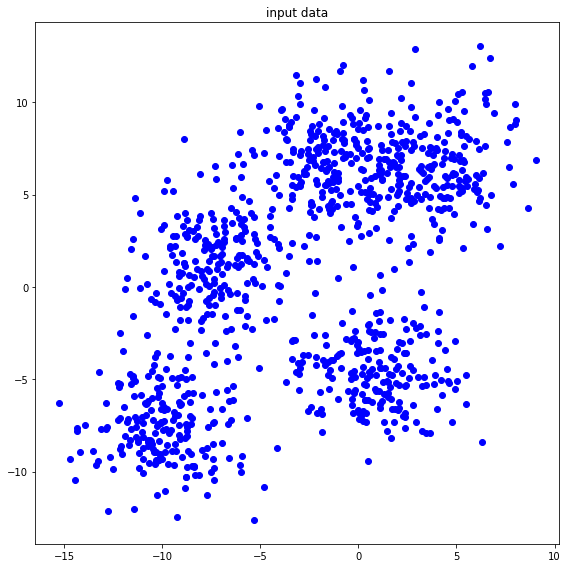

In [320]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

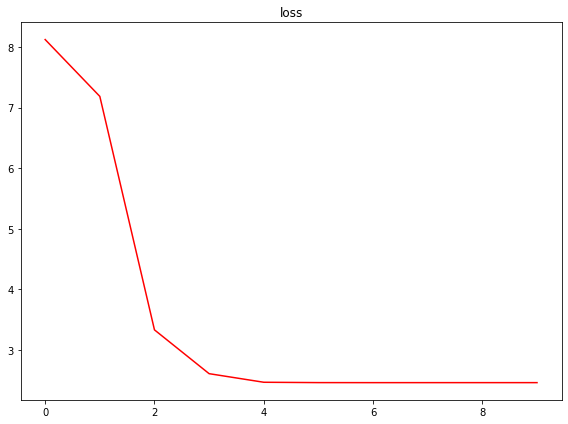

In [321]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

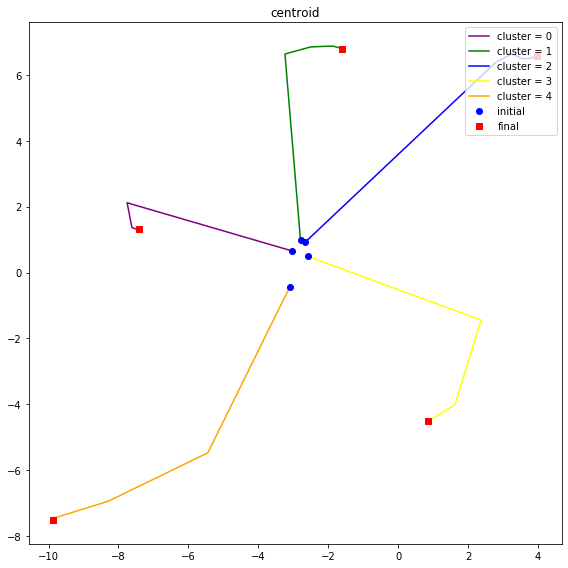

In [323]:
plot_centroid(centroid_iteration, number_cluster)

***

4. plot the final clustering result with the number of clusters being 5

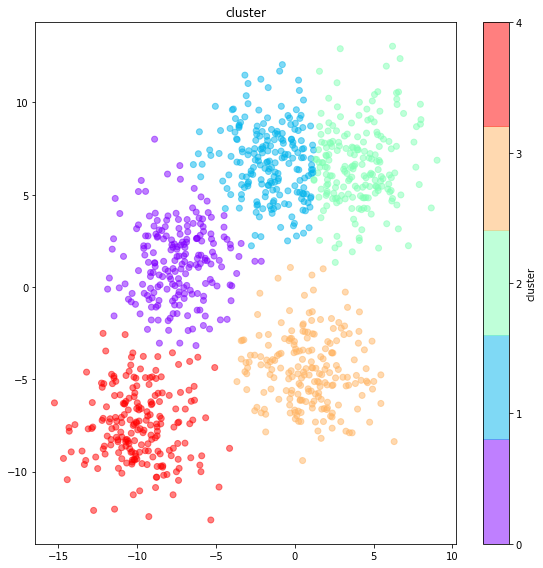

In [324]:
plot_cluster(feature, label_feature, number_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

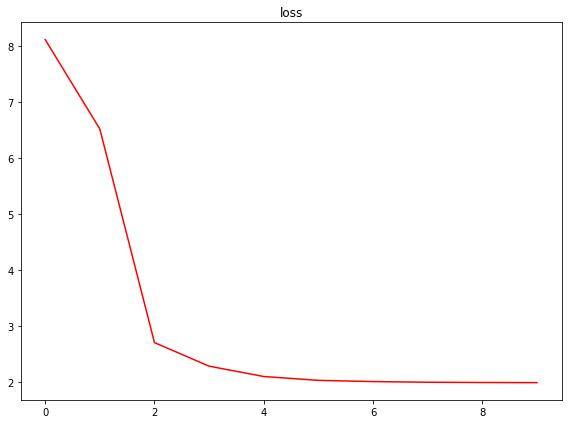

In [325]:
plot_loss_curve(loss_iteration_2)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

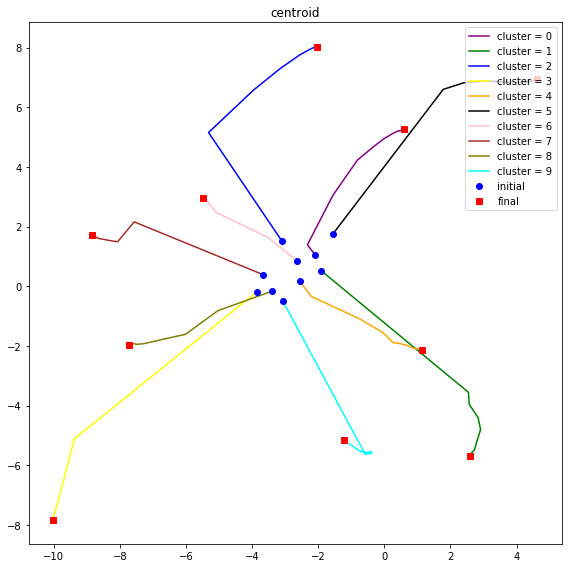

In [327]:
plot_centroid(centroid_iteration_2, number_cluster_2)

***

7. plot the final clustering result with the number of clusters being 10

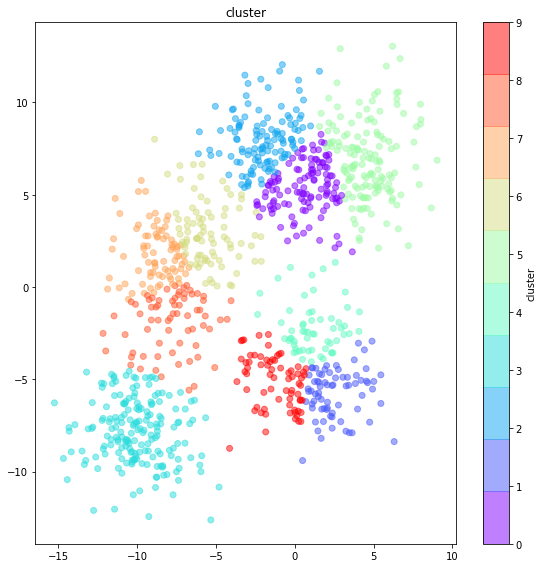

In [328]:
plot_cluster(feature, label_feature_2, number_cluster_2)

***